In [18]:
# import mdptoolbox.example
# from mdptoolbox import mdp
import hiive.mdptoolbox
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import hiive.mdptoolbox.example
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
import pandas as pd

# read in forest problem
P, R = hiive.mdptoolbox.example.forest(S=1000, p=0.01)

## Value Iteration
***

In [38]:
discounts = [0.9, 0.95, 0.99]
val_iters = {}
for d in discounts:
    vi = ValueIteration(P, R, d)
    vi.run()
    val_iters[d] = vi


#### Value Iteration Plots:

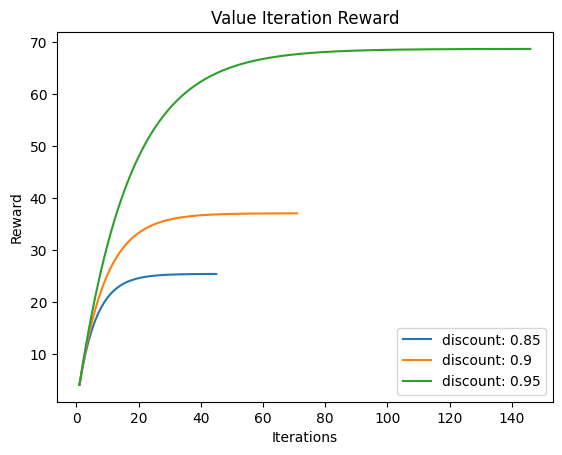

In [20]:
# Reward
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, rewards, label='discount: {}'.format(d))
    
plt.ylabel('Reward')
plt.xlabel('Iterations')
plt.title('Value Iteration Reward')

plt.legend()
plt.show()

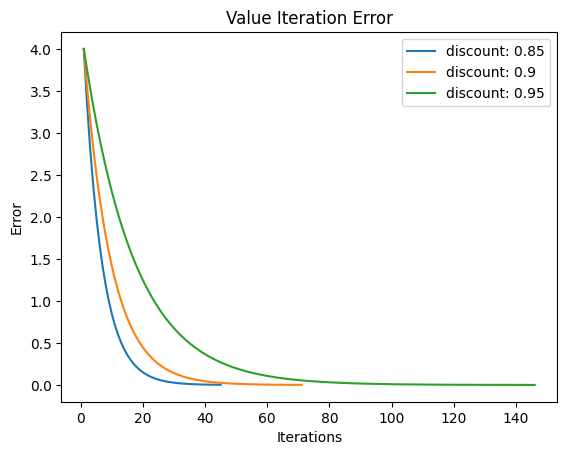

In [21]:
# errors
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, errors, label='discount: {}'.format(d))
    
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Value Iteration Error')

plt.legend()
plt.show()

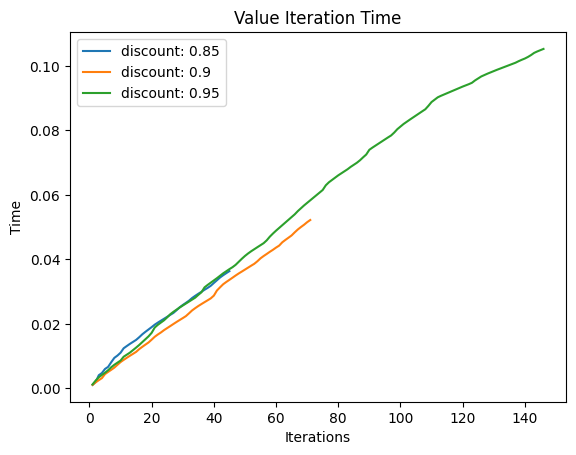

In [22]:
# times
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, times, label='discount: {}'.format(d))
    
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title('Value Iteration Time')

plt.legend()
plt.show()

## Policy Iteration
***

In [39]:
discounts = [0.9, 0.95, 0.99]
pol_iters = {}
for d in discounts:
    pi = PolicyIteration(P, R, d)
    pi.run()
    pol_iters[d] = pi


#### Policy Iteration Plots

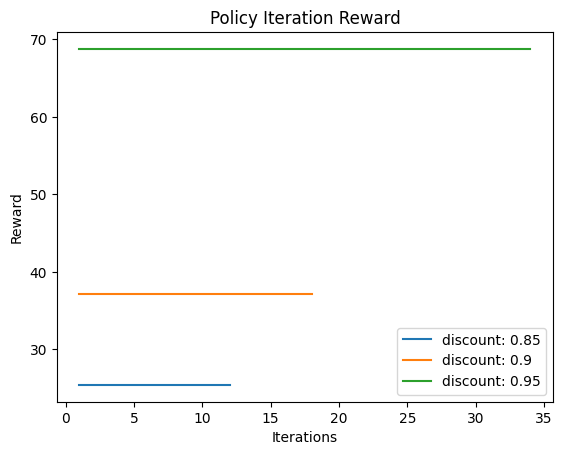

In [24]:
# Reward
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, rewards, label='discount: {}'.format(d))
    
plt.ylabel('Reward')
plt.xlabel('Iterations')
plt.title('Policy Iteration Reward')

plt.legend()
plt.show()

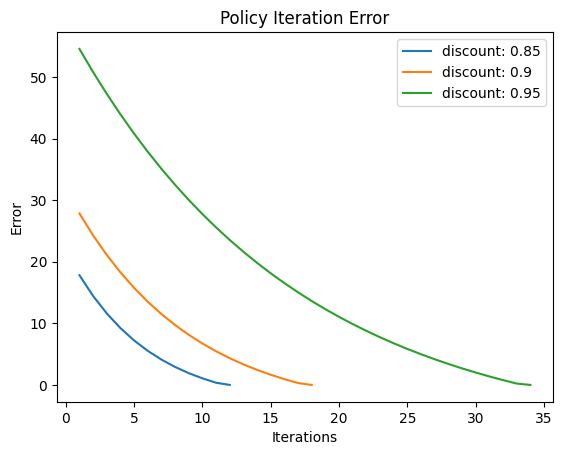

In [25]:
# Errors
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, errors, label='discount: {}'.format(d))
    
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Policy Iteration Error')

plt.legend()
plt.show()

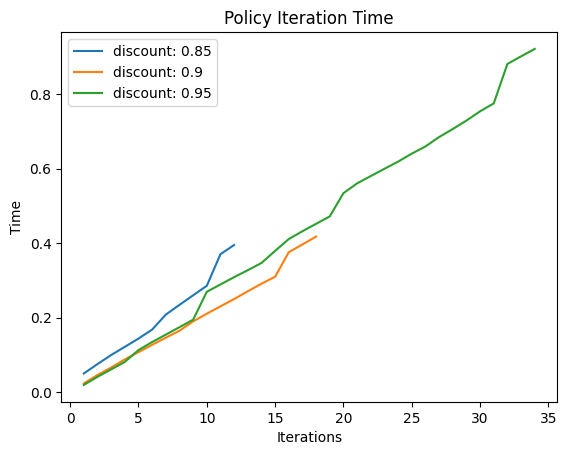

In [26]:
# Times
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, times, label='discount: {}'.format(d))
    
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title('Policy Iteration Time')

plt.legend()
plt.show()

### Comparison Plots

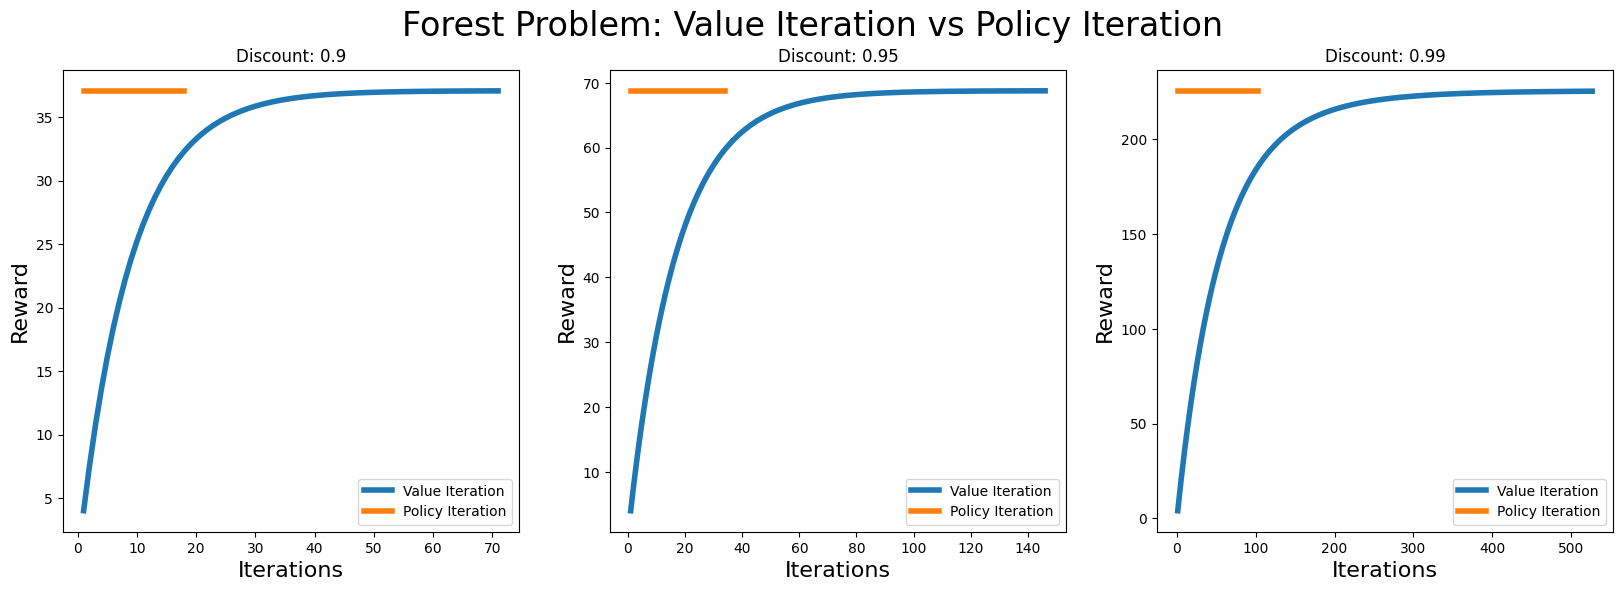

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))


vi_num_iters_converge = []
pi_num_iters_converge = []

# Discount = 0.9
d = 0.9
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax1.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax1.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax1.set_ylabel('Reward', fontsize=16)
ax1.set_xlabel('Iterations', fontsize=16)
ax1.set_title('Discount: {}'.format(d))
ax1.legend()


# Discount = 0.95
d = 0.95
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax2.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax2.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax2.set_ylabel('Reward', fontsize=16)
ax2.set_xlabel('Iterations', fontsize=16)
ax2.set_title('Discount: {}'.format(d))
ax2.legend()

# Discount = 0.99
d = 0.99
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax3.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax3.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax3.set_ylabel('Reward', fontsize=16)
ax3.set_xlabel('Iterations', fontsize=16)
ax3.set_title('Discount: {}'.format(d))
ax3.legend()


plt.suptitle('Forest Problem: Value Iteration vs Policy Iteration', fontsize=24)
plt.show()


#### Number of iterations to convergence

In [42]:
print(".9: val: ", len(val_iters[0.9].run_stats), "pol: ", len(pol_iters[0.9].run_stats))
print(".95: val: ", len(val_iters[0.95].run_stats), "pol: ", len(pol_iters[0.95].run_stats))
print(".99: val: ", len(val_iters[0.99].run_stats), "pol: ", len(pol_iters[0.99].run_stats))


.9: val:  71 pol:  18
.95: val:  146 pol:  34
.99: val:  527 pol:  103


### What is a large dataset? Time complexity vs. num states

In [35]:
num_states = [i*100 for i in range(1, 11)]

vi_times = []
vi_iters = []

pi_times = []
pi_iters = []

for s in num_states:
    tmp_P, tmp_R = hiive.mdptoolbox.example.forest(S=s, p=0.01)
    vi = ValueIteration(tmp_P, tmp_R, 0.99)
    vi.run()
    vi_stats = vi.run_stats
    vi_time = [i['Time'] for i in vi_stats][-1]
    vi_iter = [i['Iteration'] for i in vi_stats][-1]
    vi_times.append(vi_time)
    vi_iters.append(vi_iter)
    
    pi = PolicyIteration(tmp_P, tmp_R, 0.99)
    pi.run()
    pi_stats = pi.run_stats
    pi_time = [i['Time'] for i in pi_stats][-1]
    pi_iter = [i['Iteration'] for i in pi_stats][-1]
    pi_times.append(pi_time)
    pi_iters.append(pi_iter)



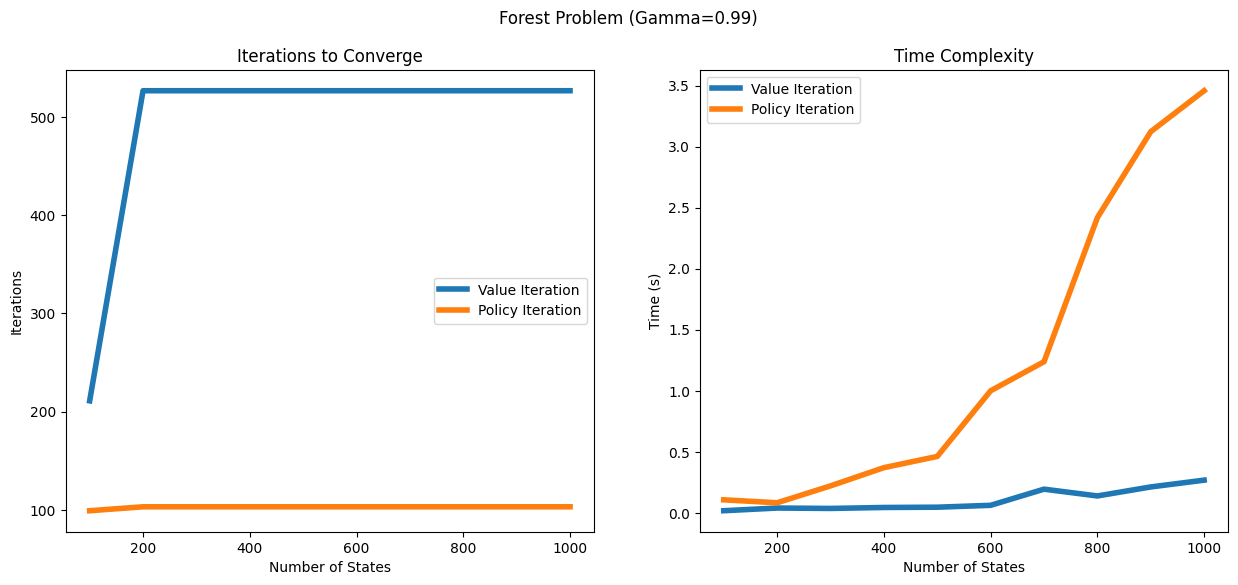

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax2.plot(num_states, vi_times, label='Value Iteration', color='tab:blue', linewidth=4)
ax2.plot(num_states, pi_times, label='Policy Iteration',color='tab:orange', linewidth=4)
ax2.set_ylabel('Time (s)')
ax2.set_xlabel('Number of States')
ax2.set_title('Time Complexity')
ax2.legend()


ax1.plot(num_states, vi_iters, label='Value Iteration', color='tab:blue', linewidth=4)
ax1.plot(num_states, pi_iters, label='Policy Iteration',color='tab:orange', linewidth=4)
ax1.set_ylabel('Iterations')
ax1.set_xlabel('Number of States')
ax1.set_title('Iterations to Converge')
ax1.legend()
plt.suptitle('Forest Problem (Gamma=0.99)')
plt.show()

#### number of iterations to convergence of various state space sizes

In [33]:
print(num_states)
print(vi_iters)
print(pi_iters)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
[99, 103, 103, 103, 103, 103, 103, 103, 103, 103]


### Time to converge policy vs value iteration

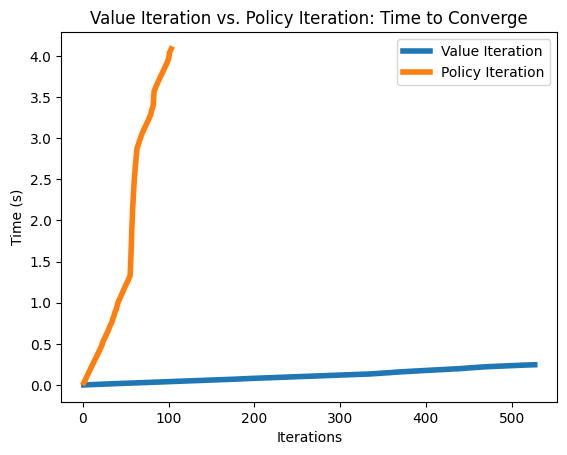

In [15]:
# Define size as s=1000 to be "Large"
# Discount=0.99
P, R = hiive.mdptoolbox.example.forest(S=1000, p=0.01)

vi = ValueIteration(tmp_P, tmp_R, 0.99)
vi.run()
vi_stats = vi.run_stats
vi_times = [i['Time'] for i in vi_stats]
vi_iters = [i['Iteration'] for i in vi_stats]

pi = PolicyIteration(tmp_P, tmp_R, 0.99)
pi.run()
pi_stats = pi.run_stats
pi_times = [i['Time'] for i in pi_stats]
pi_iters = [i['Iteration'] for i in pi_stats]


plt.plot(vi_iters, vi_times, label='Value Iteration', color='tab:blue', linewidth=4)
plt.plot(pi_iters, pi_times, label='Policy Iteration', color='tab:orange', linewidth=4)
plt.legend()
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title('Value Iteration vs. Policy Iteration: Time to Converge')
plt.show()


## QLearning
***

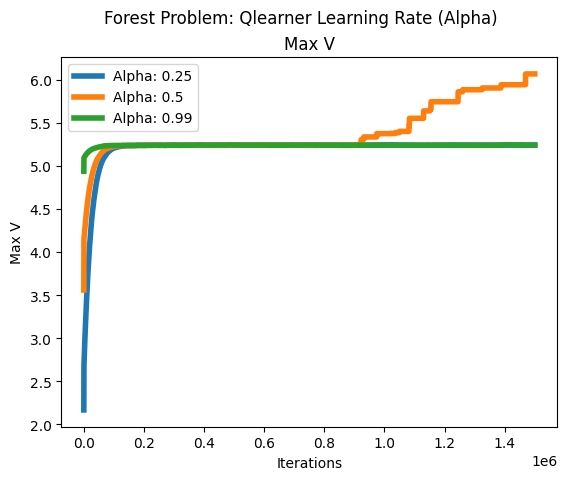

In [6]:
ql_alphas = {}
for alpha in [0.25, 0.5, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha=alpha, 
                   alpha_min=0.001,
                   epsilon=1.0,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_alphas[alpha] = (mean_v, max_v, times, rewards, ql.policy)
    


fig, ax1 = plt.subplots()
for alpha in [0.25, 0.5, 0.99]:
    ax1.plot(iters, ql_alphas[alpha][1], label='Alpha: {}'.format(alpha), linewidth=4)
    


ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')


ax1.legend()
plt.suptitle('Forest Problem: Qlearner Learning Rate (Alpha)')
plt.show()

### Alpha Decay

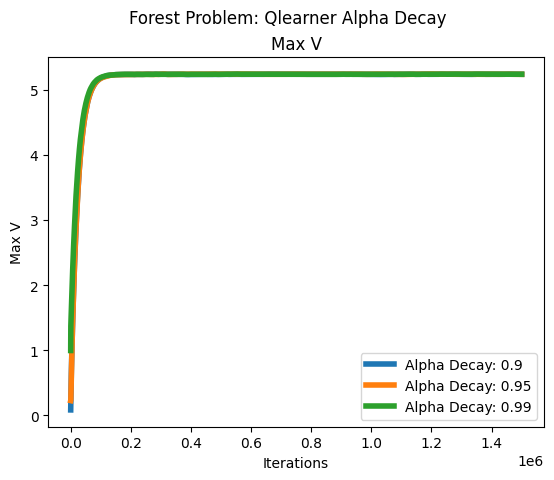

In [7]:
ql_decays = {}
for alpha_decay in [0.9, 0.95, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha_decay=alpha_decay, 
                   alpha_min=0.001,
                   epsilon=1.0,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_decays[alpha_decay] = (mean_v, max_v, times, rewards, ql.policy)
    


fig, ax1 = plt.subplots()
for alpha_decay in [0.9, 0.95, 0.99]:
    ax1.plot(iters, ql_decays[alpha_decay][1], label='Alpha Decay: {}'.format(alpha_decay), linewidth=4)
    

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')


ax1.legend()
plt.suptitle('Forest Problem: Qlearner Alpha Decay')
plt.show()

### Epsilon

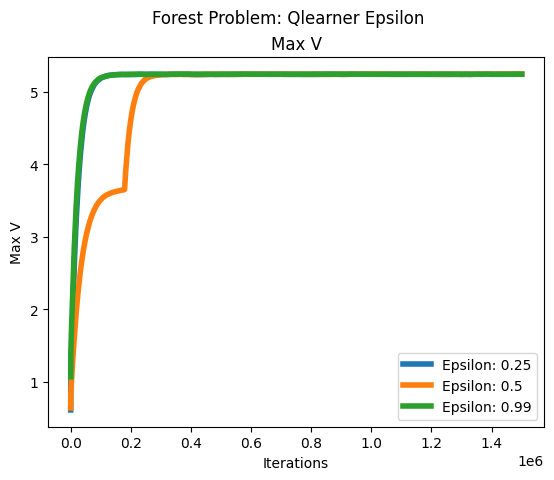

In [9]:
ql_epsilons = {}
for epsilon in [0.25, 0.5, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha_min=0.001,
                   epsilon=epsilon,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_epsilons[epsilon] = (mean_v, max_v, times, rewards, ql.policy)
    

fig, ax1 = plt.subplots()
for epsilon in [0.25, 0.5, 0.99]:
    ax1.plot(iters, ql_epsilons[epsilon][1], label='Epsilon: {}'.format(epsilon), linewidth=4)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')


ax1.legend()
plt.suptitle('Forest Problem: Qlearner Epsilon')
plt.show()

In [30]:
vi_max_vs, pi_max_vs, ql_max_vs = [], [], []
vi_iters, pi_iters, ql_iters = [], [], []

for s in num_states:
    tmp_P, tmp_R = hiive.mdptoolbox.example.forest(S=s, p=0.01)
    vi = ValueIteration(tmp_P, tmp_R, 0.99)
    vi.run()
    vi_stats = vi.run_stats
    vi_max_v = [i['Max V'] for i in vi_stats][-1]
    vi_iter = [i['Iteration'] for i in vi_stats][-1]
    vi_max_vs.append(vi_max_v)
    vi_iters.append(vi_iter)
    
    pi = PolicyIteration(tmp_P, tmp_R, 0.99)
    pi.run()
    pi_stats = pi.run_stats
    pi_max_v = [i['Max V'] for i in pi_stats][-1]
    pi_iter = [i['Iteration'] for i in pi_stats][-1]
    pi_max_vs.append(pi_max_v)
    pi_iters.append(pi_iter)
    
    ql = QLearning(tmp_P, tmp_R, 0.99, n_iter=1500000)
    ql.run()
    ql = ql.run_stats
    ql_max_v = [i['Max V'] for i in ql_stats][-1]
    ql_iter = [i['Iteration'] for i in ql_stats][-1]
    ql_max_vs.append(ql_max_v)
    ql_iters.append(ql_iter)

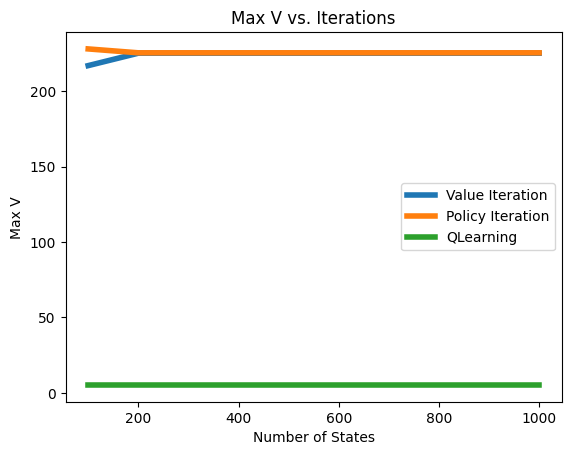

In [32]:
plt.plot(num_states, vi_max_vs, label="Value Iteration", linewidth=4)
plt.plot(num_states, pi_max_vs, label="Policy Iteration", linewidth=4)
plt.plot(num_states, ql_max_vs, label="QLearning", linewidth=4)
plt.xlabel('Number of States')
plt.ylabel('Max V')
plt.title('Max V vs. Iterations')
plt.legend()
plt.show()

In [13]:
import time

vi_times, pi_times, ql_times = [], [], []
ql_percentages = []
for i in [100, 200, 500, 1000]:
    tmp_P, tmp_R = hiive.mdptoolbox.example.forest(S=i, p=0.01)
    vi_start = time.time()
    vi = ValueIteration(tmp_P, tmp_R, 0.9)
    vi.run();
    vi_end = time.time()
    vi_times.append(vi_end-vi_start)

    pi_start = time.time()
    pi = PolicyIteration(tmp_P, tmp_R, 0.9)
    pi.run();
    pi_end = time.time()
    pi_times.append(pi_end-pi_start)
    
    ql_start = time.time()
    ql = QLearning(tmp_P, tmp_R, 0.9, alpha=0.25, alpha_decay=0.95, epsilon=0.5, n_iter=2000000)
    ql.run();
    ql_end = time.time()
    ql_times.append(ql_end-ql_start)
    
    cnt = 0
    for i in range(len(vi.policy)):
        if ql.policy[i] == vi.policy[i]:
            cnt+= 1
    ql_percentages.append(cnt/len(vi.policy))
    
    
    
    

#### QL vs vi vs pi comparison: optimal percentages and training times

In [14]:
ql_percentages

[0.8, 0.86, 0.864, 0.781]

In [15]:
ql_times

[72.3305311203003, 78.50475311279297, 82.51431393623352, 94.66164016723633]

In [16]:
vi_times

[0.01535177230834961,
 0.007779836654663086,
 0.013653993606567383,
 0.11803793907165527]

In [17]:
pi_times

[0.05919814109802246,
 0.017246007919311523,
 0.09599494934082031,
 0.7779068946838379]